In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from scipy.special import gamma
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Poisson vs. Gaussian statistics

The given rate is 14.6/hour. In 30 minutes expect to see $ \frac{14.6}{60}\cdot 30 = 7.3 $ meteors

the probability of seeing less than 5 is then:

$$ P(X<5) = \sum_{k=0}^{4} \frac{7.3^k}{k!} e^{-7.3} \approx 14.73 \%$$

using the gaussian approximation ($\mu = \lambda$, $\sigma^2 = \lambda$):

$$ P(X<5) =  \sum_{i=0}^{4} \frac{1}{\sqrt{2\pi\lambda}} e^{-(x-\lambda)^2/(2\lambda)} \approx 14.68\% $$

In [16]:
p=0
i = np.arange(0, 5, 1)
p_k = 7.3**i / gamma(i+1) * np.exp(-7.3)
print(i)
print(p_k)
print(np.sum(p_k))

[0 1 2 3 4]
[0.00067554 0.00493143 0.01799973 0.04379934 0.0799338 ]
0.1473398510457446


In [17]:
p_k_gauss = 1/np.sqrt(2*np.pi*7.3) * np.exp(-(i-7.3)**2/(2*7.3))
p_k_gauss
print(i)
print(p_k_gauss)
print(np.sum(p_k_gauss))

[0 1 2 3 4]
[0.00383772 0.00974142 0.02156145 0.04161419 0.07003458]
0.14678936195045728


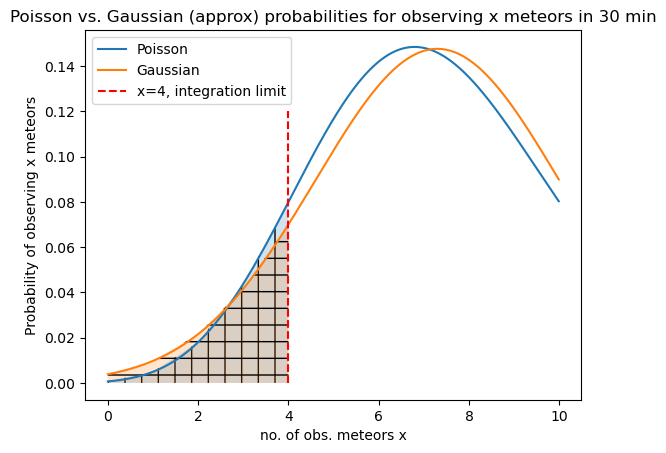

In [18]:
x = np.arange(0, 10, 0.01)
integ_region = np.arange(0, 5, 1)
plt.plot(x,  7.3**x / gamma(x+1) * np.exp(-7.3), label='Poisson')
plt.fill_between(integ_region, 7.3**integ_region / gamma(integ_region+1) * np.exp(-7.3), alpha=0.2, hatch="|")

plt.plot(x, 1/np.sqrt(2*np.pi*7.3) * np.exp(-(x-7.3)**2/(2*7.3)), label='Gaussian')
plt.fill_between(integ_region, 1/np.sqrt(2*np.pi*7.3) * np.exp(-(integ_region-7.3)**2/(2*7.3)), alpha=0.2, hatch="-")

plt.vlines(4, 0, 0.12, color='red', linestyle='--', label='x=4, integration limit')

plt.legend()
plt.title('Poisson vs. Gaussian (approx) probabilities for observing x meteors in 30 min')
plt.xlabel('no. of obs. meteors x')
plt.ylabel('Probability of observing x meteors')

plt.show()

## Variance

### Uniform distribution:

$$ p(x) = \begin{cases} \dfrac 1 {b - a} & a \le x \le b \\ 0 & \text{otherwise} \end{cases} $$

$$ 
Var(x) = E(x^2)-E(x)^2 = \int_{-\infty}^{+\infty} x^2 p(x) - \left( \int_{-\infty}^{+\infty} x p(x) \right)^2 \\ 
= \int_{-\infty}^{+\infty} x^2 \dfrac 1 {b - a} - \left( \int_{-\infty}^{+\infty} x \dfrac 1 {b - a} \right)^2 \\
= \int_{a}^{b} x^2 \dfrac 1 {b - a} - \left( \int_{a}^{b} x \dfrac 1 {b - a} \right)^2
= \left[x^3 \dfrac 1 {3(b - a)}  \right]^{b}_{a} - \left( \dfrac{a+b}{2} \right)^2 \\ 
= \dfrac{b^3 - a^3}{3(b - a)} - \dfrac{(a+b)^2}{4} = \dfrac{(b - a)^2}{12}
$$

### Poisson distribution:

$$P(X=k)=\frac{\lambda^k e^{-\lambda}}{k!}$$
$$E(X)=\lambda$$
$$Var(X)=E(X^2)-E(X)^2 = E(X(X-1)+X) - E(X)^2 = E(X(X-1)) + E(X) - E(X)^2 = E(X(X-1)) + \lambda - \lambda^2$$

$$ E(X(X-1)) = \sum_{x=0}^{\infty} x(x-1) \frac{\lambda^x e^{-\lambda}}{x!} = \sum_{x=2}^{\infty} \frac{\lambda^x e^{-\lambda}}{(x-2)!} \\ = \lambda^2 e^{-\lambda} \sum_{x=2}^{\infty} \frac{\lambda^{x-2}}{(x-2)!} = \lambda^2 e^{-\lambda} \left( \frac{\lambda^0}{0!} + \frac{\lambda^1}{1!} + \frac{\lambda^2}{2!} +... \right) \\  = \lambda^2 e^{-\lambda} e^{\lambda} = \lambda^2$$ 

Thus $Var(x) = \lambda$



## Global Warming

In [19]:
colspecs = [(2, 6), (10, 12), (14, 22), (24, 29), (31, 39), (41, 46), (48, 56), (58, 63), (65, 73), (75, 80), (82, 90), (92, 97)] # column specifications to load data
data = pd.read_fwf(
    "../../notebooks/data/BerkeleyEarth_GlobalLandTemperature.dat",
    colspecs=colspecs, 
    header=53
) # read data
data.columns = ["year", "month", "monthly_a", "monthly_unc", "annual_a", "annual_unc", "five_year_a", "five_year_unc", "ten_year_a", "ten_year_unc", "twenty_year_a", "twenty_year_unc"]
data.head()

,year,month,monthly_a,monthly_unc,annual_a,annual_unc,five_year_a,five_year_unc,ten_year_a,ten_year_unc,twenty_year_a,twenty_year_unc
0,1833,1,-4.449,3.234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1833,2,1.267,3.641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1833,3,-0.059,2.443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1833,4,-0.749,1.446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1833,5,3.412,1.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


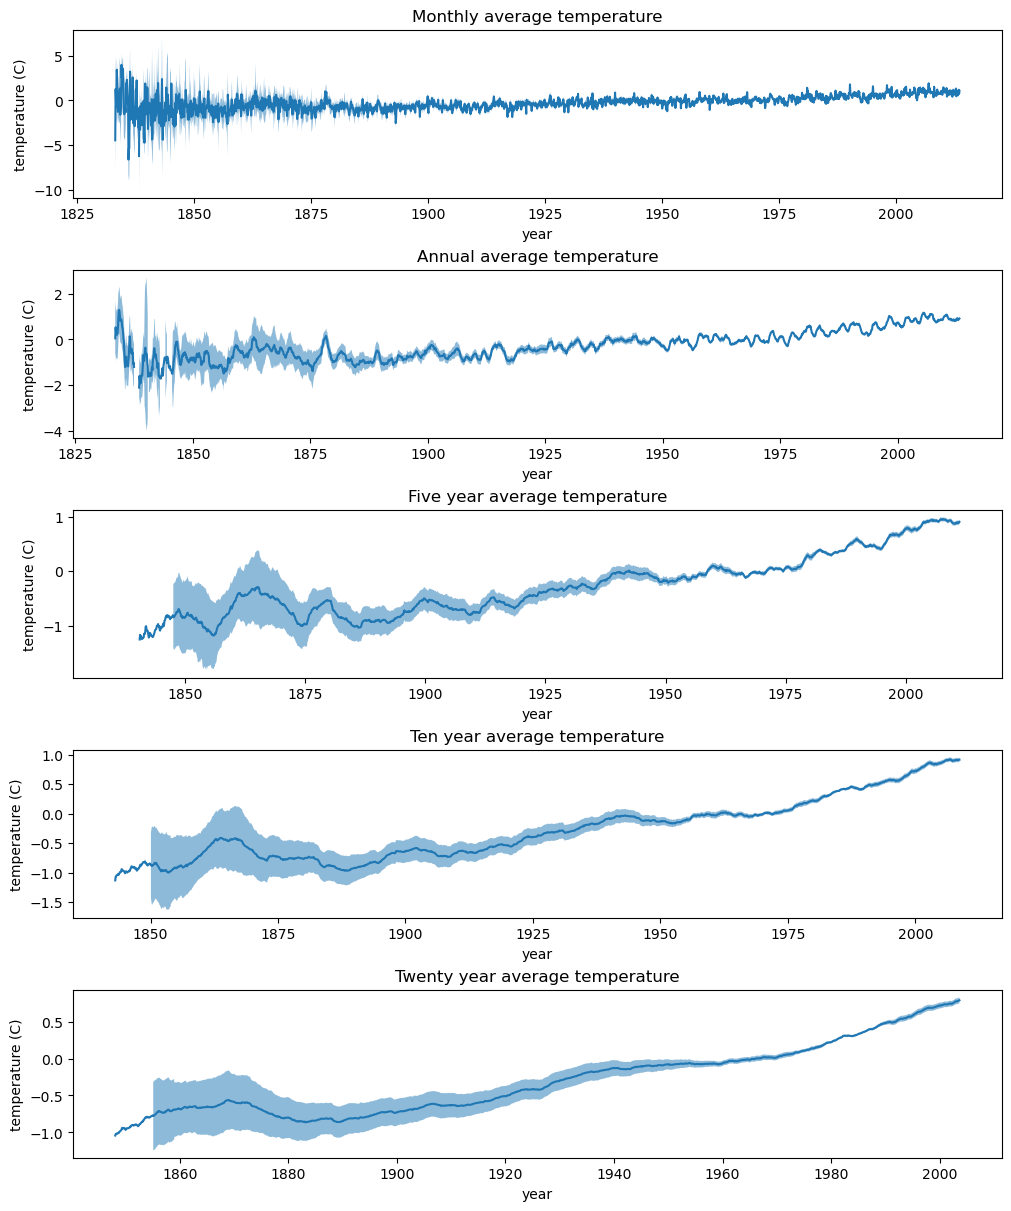

In [26]:
data["plotting_month"] = data["month"]/12 + data["year"]

# plot all data in different subplots with fill between on y axis and years on x axis
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(10, 12))

axs[0].plot(data["plotting_month"], data["monthly_a"])
axs[0].fill_between(data["plotting_month"], data["monthly_a"]-data["monthly_unc"], data["monthly_a"]+data["monthly_unc"], alpha=0.5)
axs[0].set_title("Monthly average temperature")
axs[1].plot(data["plotting_month"], data["annual_a"])
axs[1].fill_between(data["plotting_month"], data["annual_a"]-data["annual_unc"], data["annual_a"]+data["annual_unc"], alpha=0.5)
axs[1].set_title("Annual average temperature")
axs[2].plot(data["plotting_month"], data["five_year_a"])
axs[2].fill_between(data["plotting_month"], data["five_year_a"]-data["five_year_unc"], data["five_year_a"]+data["five_year_unc"], alpha=0.5)
axs[2].set_title("Five year average temperature")
axs[3].plot(data["plotting_month"], data["ten_year_a"])
axs[3].fill_between(data["plotting_month"], data["ten_year_a"]-data["ten_year_unc"], data["ten_year_a"]+data["ten_year_unc"], alpha=0.5)
axs[3].set_title("Ten year average temperature")
axs[4].plot(data["plotting_month"], data["twenty_year_a"])
axs[4].fill_between(data["plotting_month"], data["twenty_year_a"]-data["twenty_year_unc"], data["twenty_year_a"]+data["twenty_year_unc"], alpha=0.5)
axs[4].set_title("Twenty year average temperature")

for ax in axs.flat:
    ax.set(xlabel='year', ylabel='temperature (C)')

mean value (i.e weight is 1): $$ \mu = \frac{1}{N}\sum_{i} x_i $$
weighted mean: $$ \mu' = \frac{\sum_{i} w_ix_i}{\sum_{i} w_i} $$
we take the weight to be the inversed squared error: $$ w_i = \frac{1}{\sigma_i^2}$$ 

then the error propagation follows as : $$ \sigma^2_{\mu'} = \sum \sigma_i^2\left( \frac{\partial \mu'}{\partial x_i}\right)^2 $$

since $\frac{\partial \mu'}{\partial x_i} = \frac{1/\sigma^2_i}{\sum_{j} \frac{1}{\sigma_j^2}}$  we have: 
$$ 
        \sigma^2_{\mu'} = \sum \sigma_i^2\left( \frac{1/\sigma^2_i}{\sum_{j} \frac{1}{\sigma_j^2}} \right)^2 
\implies \sigma^2_{\mu'} = \frac{1}{\sum_{i} \frac{1}{\sigma_i^2}}
$$

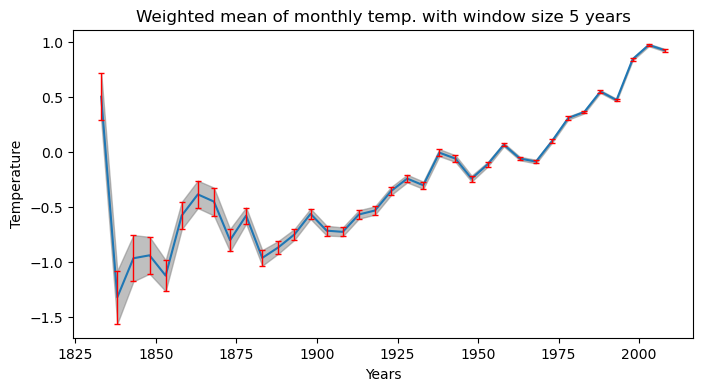

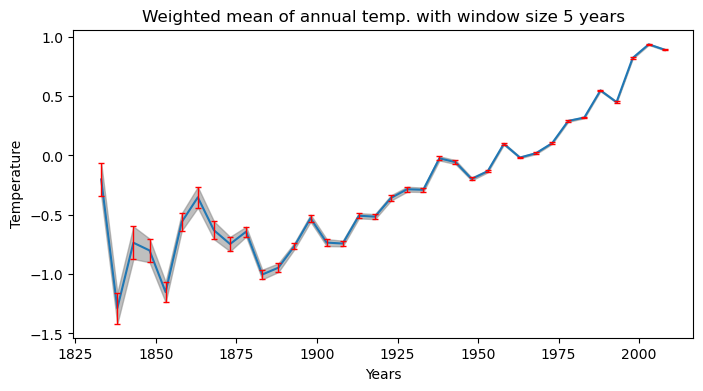

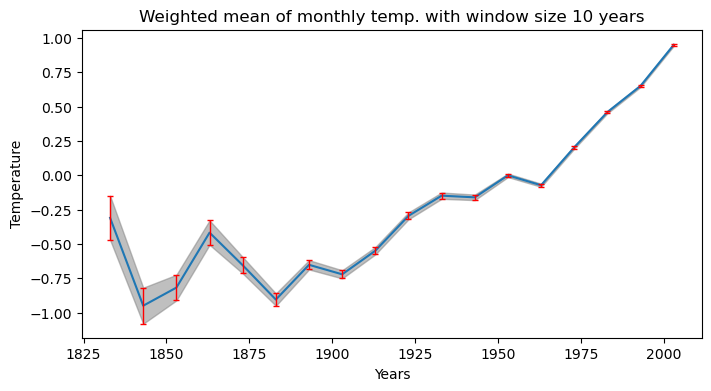

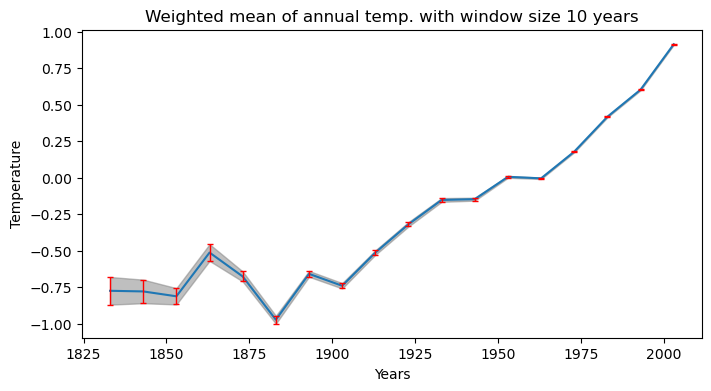

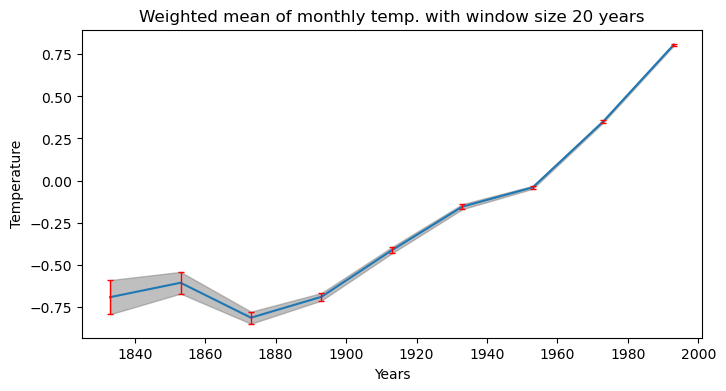

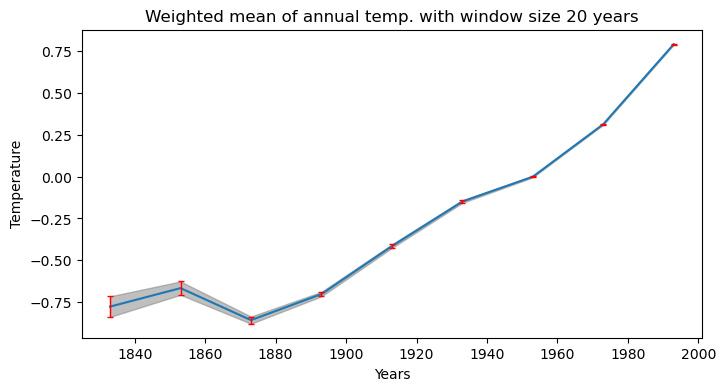

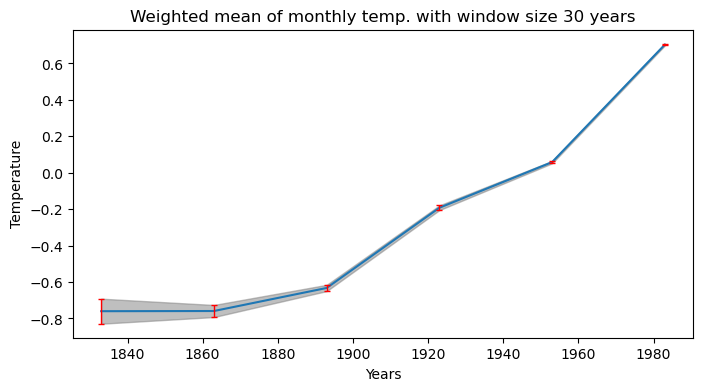

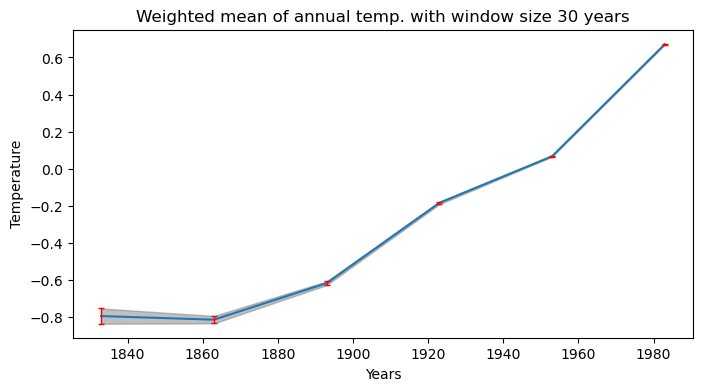

In [21]:
weighted_mean = lambda x, mu: [np.nansum(x * (1/mu**2)) / np.nansum(mu**-2), np.sqrt(1/np.nansum(mu**-2))]

# function that calculates the weighted mean and error for a given data set with a custom window size
def weighted_mean_window(arg, window_size, plot=True):
    weighted_avg_list = []
    err_list = []
    
    windows = np.arange(data["year"].min(), data["year"].max(), window_size) # create windows
    
    for i, window in enumerate(windows):
        data_dec = data[(data["year"] >= window) & (data["year"] < window+window_size)].copy() # select data in window
        weighted_avg, error_avg = weighted_mean(data_dec[f'{arg}_a'], data_dec[f'{arg}_unc']) # calculate weighted mean and error
        weighted_avg_list.append(weighted_avg) # append weighted mean to list
        err_list.append(error_avg) # append error to list
        
    if plot: # plot data if plot is True
        figure = plt.figure(figsize=(8, 4))
        plt.plot(windows, weighted_avg_list)
        plt.errorbar(windows, weighted_avg_list, yerr=err_list, fmt='none', ecolor='r', elinewidth=1, capsize=2)
        plt.fill_between(windows, np.array(weighted_avg_list)-np.array(err_list), np.array(weighted_avg_list)+np.array(err_list), alpha=0.5, color="grey")
        plt.title(f"Weighted mean of {arg} temp. with window size {window_size} years")
        plt.xlabel("Years")
        plt.ylabel("Temperature")
        plt.show()
    return weighted_avg_list, err_list

for window in [5, 10, 20, 30]:
    weighted_mean_window("monthly", window)
    weighted_mean_window("annual", window)
